In [1]:
from lib import TinyType as TT, draw_examples, make_test, run_test
from tinygrad import Tensor, dtypes
import numpy as np

## arange

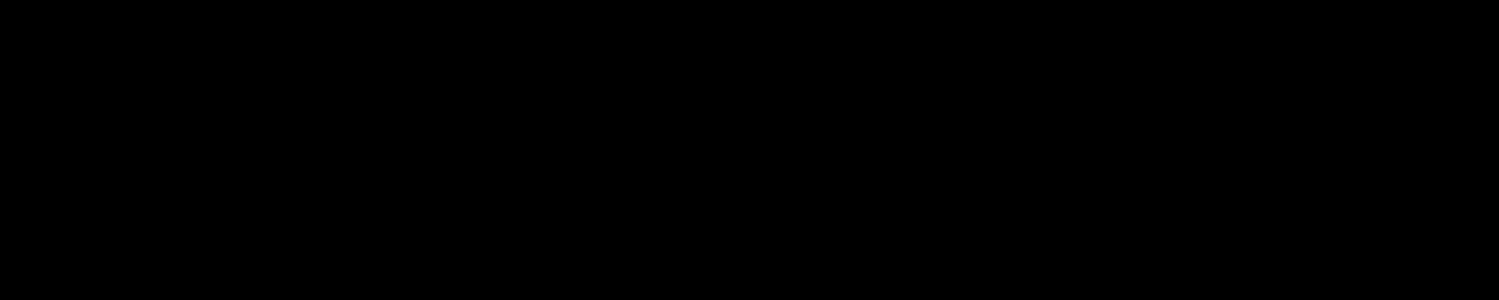

In [2]:
from solutions import arange


draw_examples("arange", [{"": arange(i)} for i in [5, 3, 9]], display_values=True)

## where

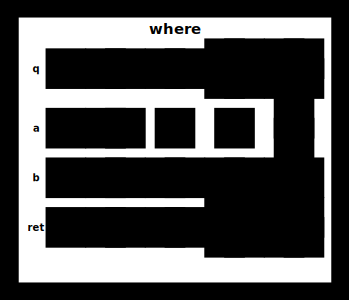

In [3]:
from solutions import where


examples = [
  (Tensor([False]), Tensor([10]), Tensor([0])),
  (Tensor([False, True]), Tensor([1, 1]), Tensor([-10, 0])),
  (Tensor([False, True]), Tensor([1]), Tensor([-10, 0])),
  (Tensor([[False, True], [True, False]]), Tensor([1]), Tensor([-10, 0])),
  (Tensor([[False, True], [True, False]]), Tensor([[0], [10]]), Tensor([-10, 1])),
]
draw_examples(
  "where", [{"q": q, "a": a, "b": b, "ret": where(q, a, b)} for q, a, b in examples],
  display_values=True
)

## Puzzle 1 - ones

Compute [ones](https://docs.tinygrad.org/tensor/creation/?h=ones#tinygrad.Tensor.ones) - the vector of all ones

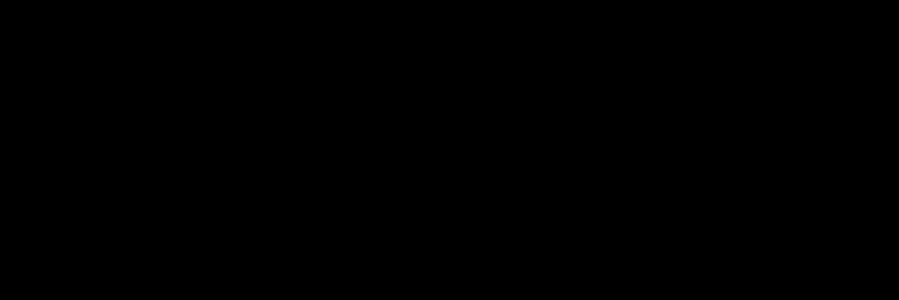

In [4]:
def ones_spec(out):
  for i in range(len(out)):
    out[i] = 1


def ones(i: int) -> TT[["i"]]:
  return Tensor(np.ones(i, dtype=np.int8))


test_ones = make_test("one", ones, ones_spec, add_sizes=["i"], display_values=True)

In [5]:
run_test(test_ones)

Correct!


## Puzzle 2 - sum

Compute [sum](https://docs.tinygrad.org/tensor/ops/?h=sum#tinygrad.Tensor.sum) - the sum of a vector

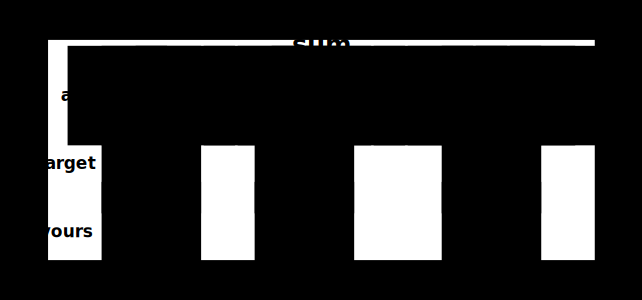

In [6]:
def sum_spec(a, out):
  out[0] = 0
  for i in range(len(a)):
    out[0] += a[i]


def sum(a: TT[["i"]]) -> TT[[1]]:
  return a @ Tensor(np.ones(a.shape[0], dtype=np.int8))[:, None]


test_sum = make_test("sum", sum, sum_spec, display_values=True)

In [7]:
run_test(test_sum)

Correct!


## Puzzle 3 - outer

Compute [outer](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) - the outer product of two vectors

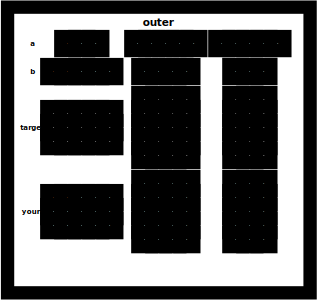

In [8]:
def outer_spec(a, b, out):
  for i in range(len(out)):
    for j in range(len(out[0])):
      out[i][j] = a[i] * b[j]


def outer(a: TT[["i"]], b: TT[["j"]]) -> TT[["i", "j"]]:
  return a[:, None] @ b[None, :]


test_outer = make_test("outer", outer, outer_spec, display_values=True)

In [9]:
run_test(test_outer)

Correct!


## Puzzle 4 - diag

Compute [diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) - the diagonal vector of a square matrix

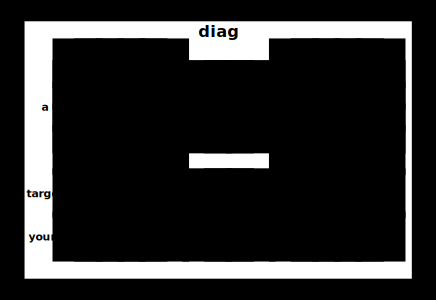

In [10]:
def diag_spec(a, out):
  for i in range(len(a)):
    out[i] = a[i][i]


def diag(a: TT[["i", "i"]]) -> TT[["i"]]:
  return a[arange(a.shape[0]), arange(a.shape[0])]


test_diag = make_test("diag", diag, diag_spec)

In [11]:
run_test(test_diag)

Correct!


## Puzzle 5 - eye

Compute [eye](https://docs.tinygrad.org/tensor/creation/?h=eye#tinygrad.Tensor.eye) - the identity matrix

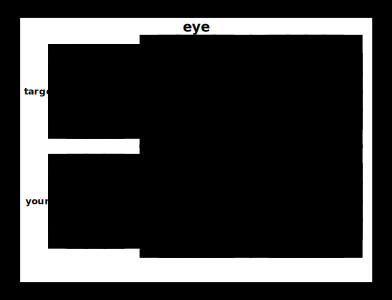

In [63]:
def eye_spec(out):
  for i in range(len(out)):
    out[i][i] = 1


def eye(j: int) -> TT[["j", "j"]]:
  return (arange(j)[:, None] == arange(j)) * 1



test_eye = make_test("eye", eye, eye_spec, add_sizes=["j"])

In [13]:
run_test(test_eye)

Correct!


## Puzzle 6 - triu

Compute [triu](https://docs.tinygrad.org/tensor/ops/?h=triu#tinygrad.Tensor.triu) - the upper triangular matrix

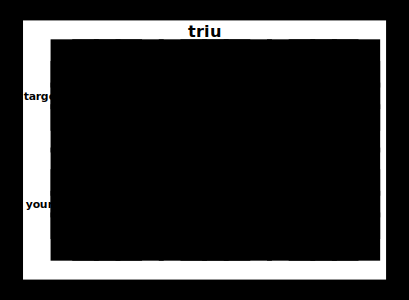

In [14]:
def triu_spec(out):
  for i in range(len(out)):
    for j in range(len(out)):
      if i <= j:
        out[i][j] = 1
      else:
        out[i][j] = 0


def triu(j: int) -> TT[["j", "j"]]:
  return (arange(j)[:, None] <= arange(j)) * 1


test_triu = make_test("triu", triu, triu_spec, add_sizes=["j"])

In [15]:
run_test(test_triu)

Correct!


## Puzzle 7 - cumsum

Compute [cumsum](https://docs.tinygrad.org/tensor/ops/?h=cumsum#tinygrad.Tensor.cumsum) - the cumulative sum

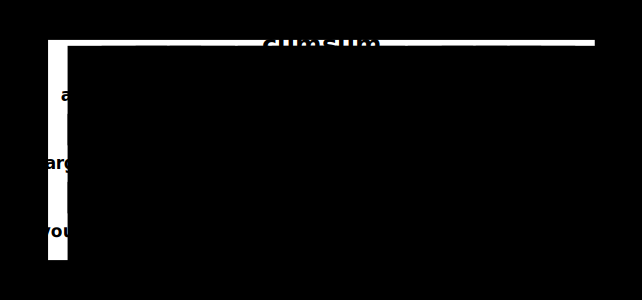

In [16]:
def cumsum_spec(a, out):
  total = 0
  for i in range(len(out)):
    out[i] = total + a[i]
    total += a[i]


def cumsum(a: TT[["i"]]) -> TT[["i"]]:
  return a @ triu(a.shape[0])


test_cumsum = make_test("cumsum", cumsum, cumsum_spec, display_values=True)

In [17]:
run_test(test_cumsum)

Correct!


## Puzzle 8 - diff

Compute [diff](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) - the running difference

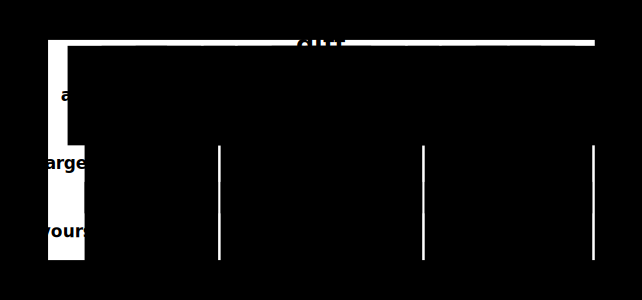

In [18]:
def diff_spec(a, out):
  for i in range(1, len(a)):
    out[i - 1] = a[i] - a[i - 1]


def diff(a: TT[["i"]]) -> TT[["i - 1"]]:
  return a[1:] - a[:-1]


test_diff = make_test("diff", diff, diff_spec, display_values=True)

In [19]:
run_test(test_diff)

Correct!


## Puzzle 9 - vstack

Compute [vstack](https://docs.tinygrad.org/tensor/movement/?h=stack#tinygrad.Tensor.stack) - the matrix of two vectors

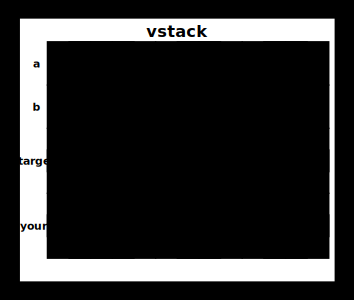

In [20]:
def vstack_spec(a, b, out):
  for i in range(len(out[0])):
    out[0][i] = a[i]
    out[1][i] = b[i]


def vstack(a: TT[["i"]], b: TT[["i"]]) -> TT[[2, "i"]]:
  return Tensor([[1], [0]]) * a + Tensor([[0], [1]]) * b


test_vstack = make_test("vstack", vstack, vstack_spec)

In [21]:
run_test(test_vstack)

Correct!


## Puzzle 10 - roll

Compute [roll](https://numpy.org/doc/stable/reference/generated/numpy.roll.html) - the vector shifted 1 circular position

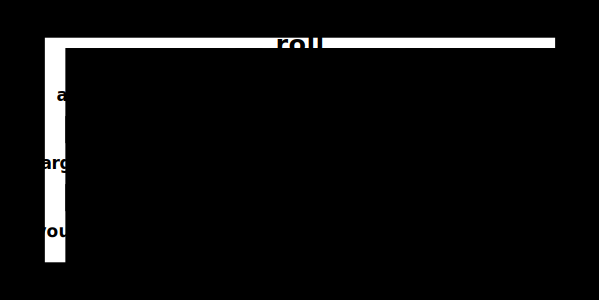

In [22]:
def roll_spec(a, out):
  for i in range(len(out)):
    if i + 1 < len(out):
      out[i] = a[i + 1]
    else:
      out[i] = a[i + 1 - len(out)]


def roll(a: TT[["i"]], i: int) -> TT[["i"]]:
  # Could easily write a generic version (this is the shift 1 version)
  # Modulo the shift val to stay in range
  # Then construct the idx list
  return a[[x for x in range(1, a.shape[0])] + [0]]


test_roll = make_test("roll", roll, roll_spec, add_sizes=["i"], display_values=True)

In [23]:
run_test(test_roll)

Correct!


## Puzzle 11 - flip

Compute [flip](https://docs.tinygrad.org/tensor/movement/?h=flip#tinygrad.Tensor.flip) - the reversed vector

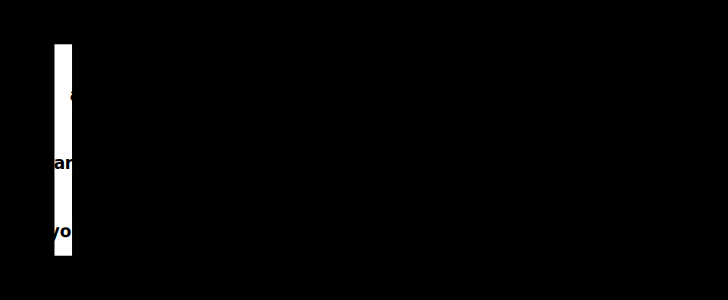

In [24]:
def flip_spec(a, out):
  for i in range(len(out)):
    out[i] = a[len(out) - i - 1]


def flip(a: TT[["i"]], i: int) -> TT[["i"]]:
  return a[::-1]


test_flip = make_test("flip", flip, flip_spec, add_sizes=["i"])

In [25]:
run_test(test_flip)

Correct!


## Puzzle 12 - compress

Compute [compress](https://numpy.org/doc/stable/reference/generated/numpy.compress.html) - keep only masked entries (left-aligned)

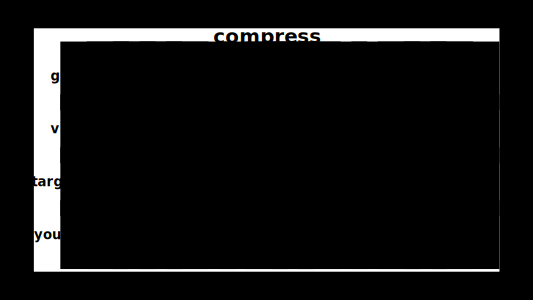

In [26]:
def compress_spec(g, v, out):
  j = 0
  for i in range(len(g)):
    if g[i]:
      out[j] = v[i]
      j += 1


def compress(g: TT[["i"], dtypes.bool], v: TT[["i"]], i: int) -> TT[["i"]]:
  return (g * cumsum(1 * g) == (arange(i) + 1)[:, None]) @ v


test_compress = make_test(
  "compress", compress, compress_spec, add_sizes=["i"], display_values=True
)

In [27]:
run_test(test_compress)

Correct!


## Puzzle 13 - pad_to

Compute [pad_to](https://docs.tinygrad.org/tensor/movement/?h=pad#tinygrad.Tensor.pad2d) - eliminate or add 0s to change size of vector

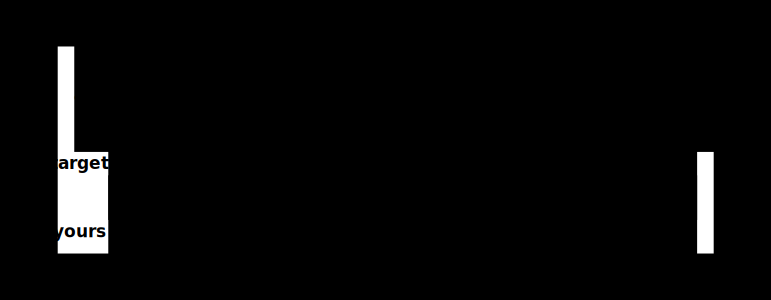

In [28]:
def pad_to_spec(a, out):
  for i in range(min(len(out), len(a))):
    out[i] = a[i]


def pad_to(a: TT[["i"]], j: int) -> TT[["j"]]:
  return a[arange(j)]


test_pad_to = make_test(
  "pad_to", pad_to, pad_to_spec, add_sizes=["j"], display_values=True
)

In [29]:
run_test(test_pad_to)

Correct!


## Puzzle 14 - sequence_mask

Compute [sequence_mask](https://www.tensorflow.org/api_docs/python/tf/sequence_mask) - pad out to length per batch

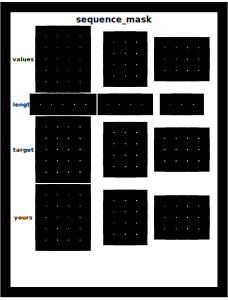

In [30]:
def sequence_mask_spec(values, length, out):
  for i in range(len(out)):
    for j in range(len(out[0])):
      if j < length[i]:
        out[i][j] = values[i][j]
      else:
        out[i][j] = 0


def sequence_mask(values: TT[["i", "j"]], length: TT[["i"], dtypes.int]) -> TT[["i", "j"]]:  # fmt: skip
  return (arange(values.shape[1]) < length[:, None]) * values


def constraint_set_length(d):
  d["length"] = d["length"] % d["values"].shape[1]
  return d


test_sequence = make_test(
  "sequence_mask",
  sequence_mask,
  sequence_mask_spec,
  constraint=constraint_set_length,
  display_values=True,
)

In [31]:
run_test(test_sequence)

Correct!


## Puzzle 15 - bincount

Compute [bincount](https://numpy.org/doc/stable/reference/generated/numpy.bincount.html) - count number of times an entry was seen

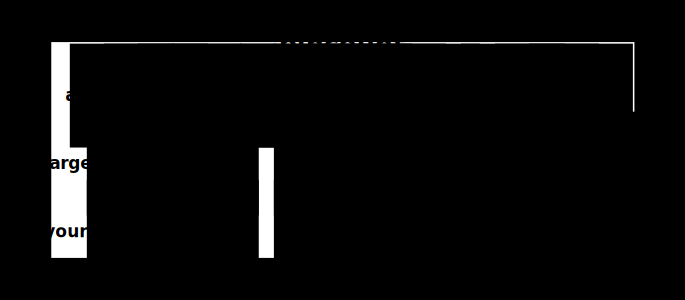

In [32]:
def bincount_spec(a, out):
  for i in range(len(a)):
    out[a[i]] += 1


def bincount(a: TT[["i"]], j: int) -> TT[["j"]]:
  return Tensor([1 for x in range(a.shape[0])]) @ (a[:, None] == arange(j))


def constraint_set_max(d):
  d["a"] = d["a"] % d["return"].shape[0]
  return d


test_bincount = make_test(
  "bincount",
  bincount,
  bincount_spec,
  add_sizes=["j"],
  constraint=constraint_set_max,
  display_values=True,
)

In [33]:
run_test(test_bincount)

Correct!


## Puzzle 16 - scatter_add

Compute [scatter_add](https://pytorch-scatter.readthedocs.io/en/1.3.0/functions/add.html) - add together values that link to the same location

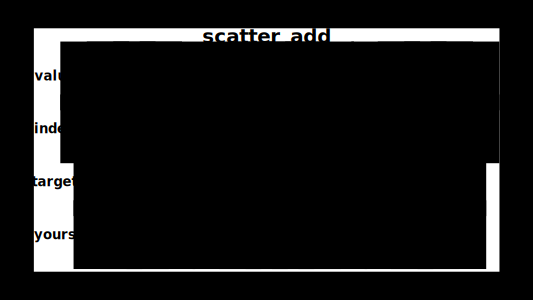

In [65]:
def scatter_add_spec(values, index, out):
  for j in range(len(values)):
    out[index[j]] += values[j]


def scatter_add(value: TT[["i"]], index: TT[["i"]], j: int) -> TT[["j"]]:
  return ((index == arange(j)[:, None]) * 1) @ value


def constraint_set_max(d):
  d["index"] = d["index"] % d["return"].shape[0]
  return d


test_scatter_add = make_test(
  "scatter_add",
  scatter_add,
  scatter_add_spec,
  add_sizes=["j"],
  constraint=constraint_set_max,
  display_values=True,
)

In [35]:
run_test(test_scatter_add)

Correct!


## Puzzle 17 - flatten

Compute [flatten](https://docs.tinygrad.org/tensor/movement/?h=flatt#tinygrad.Tensor.flatten)

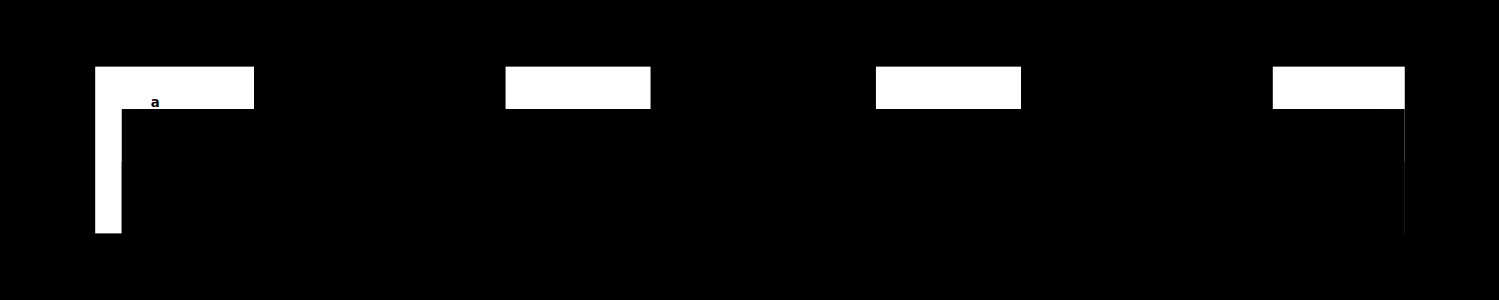

In [69]:
def flatten_spec(a, out):
  k = 0
  for i in range(len(a)):
    for j in range(len(a[0])):
      out[k] = a[i][j]
      k += 1


def flatten(a: TT[["i", "j"]]) -> TT[["i * j"]]:
  i, j = a.shape[0], a.shape[1]
  idx0 = [y for y in range(i) for x in range(j)]
  idx1 = [x for y in range(i) for x in range(j)]
  return a[idx0, idx1]


test_flatten = make_test("flatten", flatten, flatten_spec)

In [70]:
run_test(test_flatten)

Correct!


## Puzzle 18 - linspace

Compute [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

/var/folders/xv/qvm0rjns6kl0ltf5ygwwk0c00000gn/T/ipykernel_7758/1930367011.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))


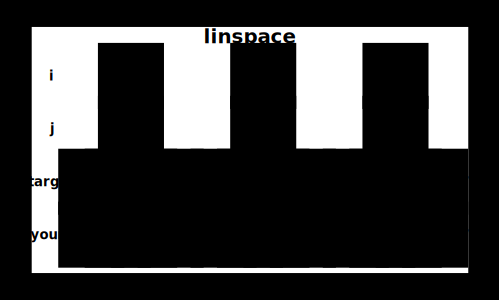

In [71]:
def linspace_spec(i, j, out):
  for k in range(len(out)):
    out[k] = float(i + (j - i) * k / max(1, len(out) - 1))


def linspace(i: TT[[1]], j: TT[[1]], n: int) -> TT[["n"], dtypes.float]:
  step = ((j - i)/(n-1)) if n != 1 else 0
  z = cumsum(ones(n) * step) - step
  return z + i


test_linspace = make_test(
  "linspace", linspace, linspace_spec, add_sizes=["n"], display_values=True
)

In [72]:
run_test(test_linspace)

/var/folders/xv/qvm0rjns6kl0ltf5ygwwk0c00000gn/T/ipykernel_7758/1930367011.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))


Correct!


## Puzzle 19 - heaviside

Compute [heaviside](https://numpy.org/doc/stable/reference/generated/numpy.heaviside.html)

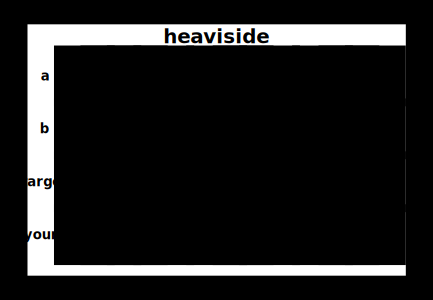

In [73]:
def heaviside_spec(a, b, out):
  for k in range(len(out)):
    if a[k] == 0:
      out[k] = b[k]
    else:
      out[k] = int(a[k] > 0)


def heaviside(a: TT[["i"]], b: TT[["i"]]) -> TT[["i"]]:
  return (a == 0) * 1 * b + (a > 0)


test_heaviside = make_test("heaviside", heaviside, heaviside_spec, display_values=True)

In [74]:
run_test(test_heaviside)

Correct!


## Puzzle 20 - repeat (1d)

Compute [repeat](https://docs.tinygrad.org/tensor/movement/?h=repeat#tinygrad.Tensor.repeat)

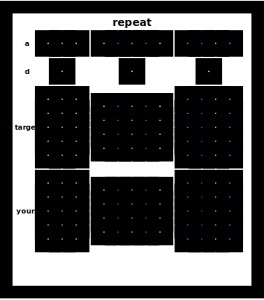

In [75]:
def repeat_spec(a, d, out):
  for i in range(d[0]):
    for k in range(len(a)):
      out[i][k] = a[k]


def constraint_set(d):
  d["d"][0] = d["return"].shape[0]
  return d


def repeat(a: TT[["i"]], d: TT[[1]]) -> TT[["d", "i"]]:
  return a * ones(d[0].numpy())[:, None]


test_repeat = make_test("repeat", repeat, repeat_spec, constraint=constraint_set)

In [76]:
run_test(test_repeat)

Correct!


## Puzzle 21 - bucketize

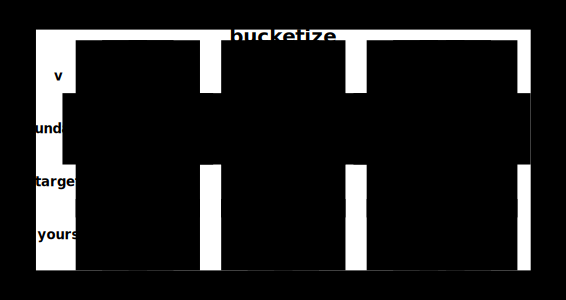

In [77]:
def bucketize_spec(v, boundaries, out):
  for i, val in enumerate(v):
    out[i] = 0
    for j in range(len(boundaries) - 1):
      if val >= boundaries[j]:
        out[i] = j + 1
    if val >= boundaries[-1]:
      out[i] = len(boundaries)


def constraint_set(d):
  d["boundaries"] = np.abs(d["boundaries"]).cumsum()
  return d


def bucketize(v: TT[["i"]], boundaries: TT[["j"]]) -> TT[["i"]]:
  return (v[:, None] >= boundaries) @ ones(boundaries.shape[0])


test_bucketize = make_test(
  "bucketize", bucketize, bucketize_spec, constraint=constraint_set, display_values=True
)

In [78]:
run_test(test_bucketize)

Correct!


Check the number of lines

In [79]:
import inspect

fns = (
  ones,
  sum,
  outer,
  diag,
  eye,
  triu,
  cumsum,
  diff,
  vstack,
  roll,
  flip,
  compress,
  pad_to,
  sequence_mask,
  bincount,
  scatter_add,
  flatten,
  linspace,
  heaviside,
  repeat,
  bucketize,
)

for fn in fns:
  lines = [
    l for l in inspect.getsource(fn).split("\n") if not l.strip().startswith("#")
  ]

  if len(lines) > 3:
    print(fn.__name__, len(lines[2]), "(more than 1 line)")
  else:
    print(fn.__name__, len(lines[1]))

ones 42
sum 64
outer 32
diag 50
eye 46
triu 46
cumsum 29
diff 23
vstack 56
roll 51
flip 16
compress 60
pad_to 21
sequence_mask 61
bincount 75
scatter_add 52
flatten 48 (more than 1 line)
linspace 35 (more than 1 line)
heaviside 35
repeat 40
bucketize 63
